# Caso Grupal: Detección de anomalías y técnicas de agrupamiento

## Participantes
 
- Rubén Darío Jaramillo Romero
- Byron Alejandro Andrango Correa
- Israel Pardo Quezada
- Diego Zapata Narvaez

## Objetivo

El objetivo de este trabajo grupal es:

- Realizar una caracterización textual, visual y estadística del dataset
- Aplicar algoritmos de detección de anomalías u outliers
- Aplicar algoritmos de agrupamiento

## Dataset CTG.csv

La actividad se realiza con el siguiente <a href="https://www.kaggle.com/akshat0007/cardiotocology/data?select=CTG.csv">dataset</a> el mismo que tiene los siguientes atributos:

- FileName: del examen CTG
- Date: del examen
- b: instante de inicio
- e: instante final
- LBE: valor de referencia (médico experto)
- LB: valor de referencia (SisPorto)
- AC: aceleraciones (SisPorto)
- FM: movimiento fetal (SisPorto)
- UC: contracciones uterinas (SisPorto)
- ASTV: porcentaje de tiempo con variabilidad anormal a corto plazo (SisPorto)
- mSTV: valor medio de la variabilidad a corto plazo (SisPorto)
- ALTV: porcentaje de tiempo con variabilidad anormal a largo plazo (SisPorto)
- mLTV: valor medio de la variabilidad a largo plazo (SisPorto)
- DL: desaceleraciones ligeras
- DS: desaceleraciones severas
- DP: desaceleraciones prolongadas
- DR: desaceleraciones repetitivas
- Width: ancho del histograma
- Min: baja frecuencia del histograma
- Max: alta frecuencia del histograma
- Nmax: número de picos de histograma
- Nzeros: número de ceros del histograma
- Mode: modo histograma
- Mean: media del histograma
- Median: mediana del histograma
- Variance: varianza del histograma
- Tendency: tendencia del histograma
- A: sueño tranquilo
- B: sueño REM
- C: tranquila vigilancia
- D: vigilancia activa
- SH: patrón de turnos (A o Susp con turnos)
- AD: patrón de aceleración/desaceleración (situación de estrés)
- DE: patrón de desaceleración (estimulación vagal)
- LD: patrón en gran parte desacelerado
- FS: patrón sinusoidal plano (estado patológico)
- SUSP: patrón sospechoso
- CLASS: Código de clase (1 a 10) para clases A a SUSP
- NSP: Normal=1; Sospechoso=2; Patológico=3

## Librerías utilizadas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

## Leer el Dataset CTG.csv

In [2]:
# Se importa el dataset con la librería Pandas
# Se imprimen 5 instancias para inspeccionar el dataset 
# Los datos se separan con "," y se muestra el título de los atributos
df_base = pd.read_csv('CTG.csv', sep=",", header=0)
df_base.head(5)

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,Variab10.txt,12/1/1996,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
1,Fmcs_1.txt,5/3/1996,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
2,Fmcs_1.txt,5/3/1996,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,5/3/1996,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,5/3/1996,CTG0005.txt,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0


In [3]:
# Se imprimen los límites del dataset
# Se comprueba que tiene 2129 instancias y 40 atributos
df_base.shape

(2129, 40)

In [4]:
# Se eliminan atributos porque no aportan interpretabilidad
# Se prescinde de algunas observaciones debido a que presentan variables desbalanceadas,
# las cuales afectan al análisis y visualización del conjunto de datos
# Algunas columnas son eliminadas debido a un alto porcentaje de valores cero, 
# notando la inexistencia de observaciones
df_base = df_base.drop(["FileName", "Date", "SegFile", "b", "e", "DS", "AC",
                      "DP", "DR", "FM", "ALTV", "DL", "Nzeros"], axis=1)
df_base.head(5)

,LBE,LB,UC,ASTV,MSTV,MLTV,Width,Min,Max,Nmax,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,120.0,120.0,0.0,73.0,0.5,2.4,64.0,62.0,126.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
1,132.0,132.0,4.0,17.0,2.1,10.4,130.0,68.0,198.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
2,133.0,133.0,5.0,16.0,2.1,13.4,130.0,68.0,198.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,134.0,134.0,6.0,16.0,2.4,23.0,117.0,53.0,170.0,11.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,132.0,132.0,5.0,16.0,2.4,19.9,117.0,53.0,170.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0


In [5]:
# Se imprimen los límites del dataset
# Luego de eliminar atributos
# Se comprueba que tiene 2129 instancias y 27 atributos
df_base.shape

(2129, 27)

## Análisis exploratorio del dataset

In [6]:
# Se imprime los tipos de atributos según su categoría
df_base.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 27 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LBE       2126 non-null   float64
 1   LB        2126 non-null   float64
 2   UC        2127 non-null   float64
 3   ASTV      2127 non-null   float64
 4   MSTV      2127 non-null   float64
 5   MLTV      2127 non-null   float64
 6   Width     2126 non-null   float64
 7   Min       2126 non-null   float64
 8   Max       2126 non-null   float64
 9   Nmax      2126 non-null   float64
 10  Mode      2126 non-null   float64
 11  Mean      2126 non-null   float64
 12  Median    2126 non-null   float64
 13  Variance  2126 non-null   float64
 14  Tendency  2126 non-null   float64
 15  A         2126 non-null   float64
 16  B         2126 non-null   float64
 17  C         2126 non-null   float64
 18  D         2126 non-null   float64
 19  E         2126 non-null   float64
 20  AD        2126 non-null   floa

In [7]:
# Se imprimen estadisticas descripctivas de los atributos
# Se transpone la matriz para una corrrecta visualización
df_base.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LBE,2126.0,133.303857,9.840844,106.0,126.0,133.0,140.0,160.0
LB,2126.0,133.303857,9.840844,106.0,126.0,133.0,140.0,160.0
UC,2127.0,3.669017,2.877148,0.0,1.0,3.0,5.0,23.0
ASTV,2127.0,47.008933,17.210648,12.0,32.0,49.0,61.0,87.0
MSTV,2127.0,1.335449,0.891543,0.2,0.7,1.2,1.7,7.0
MLTV,2127.0,8.207616,5.701926,0.0,4.6,7.4,10.8,50.7
Width,2126.0,70.445908,38.955693,3.0,37.0,67.5,100.0,180.0
Min,2126.0,93.579492,29.560212,50.0,67.0,93.0,120.0,159.0
Max,2126.0,164.025400,17.944183,122.0,152.0,162.0,174.0,238.0
Nmax,2126.0,4.068203,2.949386,0.0,2.0,3.0,6.0,18.0


In [8]:
# Se muestra la frecuencia absoluta sobre algunas variables categóricas
variables = ['A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP']
for v in variables:
    print(df_base.groupby(v).size(), '\n')

A
0.0    1742
1.0     384
dtype: int64 

B
0.0    1547
1.0     579
dtype: int64 

C
0.0    2073
1.0      53
dtype: int64 

D
0.0    2045
1.0      81
dtype: int64 

E
0.0    2054
1.0      72
dtype: int64 

AD
0.0    1794
1.0     332
dtype: int64 

DE
0.0    1874
1.0     252
dtype: int64 

LD
0.0    2019
1.0     107
dtype: int64 

FS
0.0    2057
1.0      69
dtype: int64 

SUSP
0.0    1929
1.0     197
dtype: int64 



In [9]:
# Se muestra el índice de correlación de los atributos redodneado a dos decimales
display(round(df_base.corr(), 2))

,LBE,LB,UC,ASTV,MSTV,MLTV,Width,Min,Max,Nmax,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
LBE,1.00,1.00,-0.13,0.31,-0.28,-0.03,-0.15,0.36,0.28,-0.11,...,-0.06,0.01,0.16,-0.13,-0.03,-0.12,0.07,0.28,0.14,0.15
LB,1.00,1.00,-0.13,0.31,-0.28,-0.03,-0.15,0.36,0.28,-0.11,...,-0.06,0.01,0.16,-0.13,-0.03,-0.12,0.07,0.28,0.14,0.15
UC,-0.13,-0.13,1.00,-0.07,0.25,-0.08,0.15,-0.11,0.15,0.10,...,-0.10,-0.03,-0.03,0.24,0.08,0.11,-0.21,-0.25,-0.07,-0.16
ASTV,0.31,0.31,-0.07,1.00,-0.42,-0.30,-0.26,0.28,-0.11,-0.17,...,-0.14,-0.11,0.07,-0.20,-0.13,0.14,0.31,0.36,0.28,0.47
MSTV,-0.28,-0.28,0.25,-0.42,1.00,0.09,0.66,-0.62,0.41,0.50,...,0.02,0.10,-0.13,0.28,0.26,0.28,-0.21,-0.33,0.08,-0.10
MLTV,-0.03,-0.03,-0.08,-0.30,0.09,1.00,0.11,-0.14,0.00,0.06,...,0.26,-0.09,0.05,-0.08,-0.02,-0.23,-0.10,-0.04,-0.23,-0.23
Width,-0.15,-0.15,0.15,-0.26,0.66,0.11,1.00,-0.90,0.69,0.75,...,-0.04,0.14,-0.08,0.35,0.24,0.25,-0.22,-0.27,0.15,-0.07
Min,0.36,0.36,-0.11,0.28,-0.62,-0.14,-0.90,1.00,-0.30,-0.67,...,-0.00,-0.06,0.15,-0.31,-0.32,-0.27,0.18,0.28,-0.16,0.06
Max,0.28,0.28,0.15,-0.11,0.41,0.00,0.69,-0.30,1.00,0.52,...,-0.09,0.21,0.06,0.24,-0.00,0.11,-0.18,-0.13,0.07,-0.05
Nmax,-0.11,-0.11,0.10,-0.17,0.50,0.06,0.75,-0.67,0.52,1.00,...,-0.01,0.12,-0.00,0.24,0.20,0.19,-0.17,-0.19,0.14,-0.02


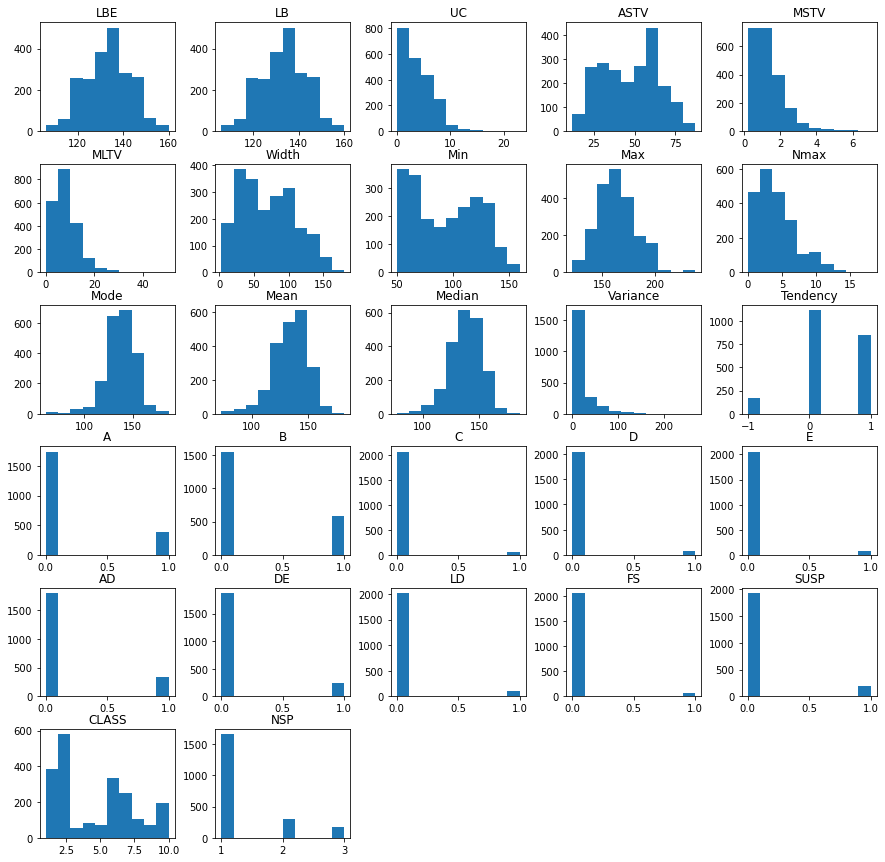

In [10]:
# Se imprimen histogramas de los atributos para conocer la distribución de los datos
# Se configura el parámetro grid como false para una visualización adecuada
df_base.hist(grid=False, figsize=(15, 15))
plt.show()

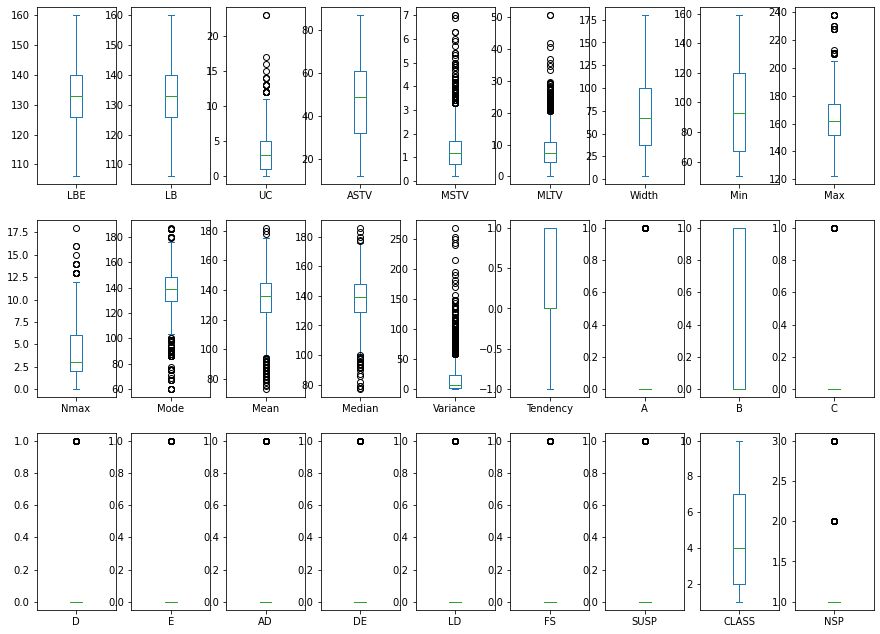

In [11]:
# Se imprimen diagramas de cajas y bigotes para conocer la distribución
# y los posibles datos atípicos de los atributos
df_base.plot(kind='box', subplots=True, layout=(4, 9),
             sharex=False, sharey=False, figsize=(15, 15))
plt.show()

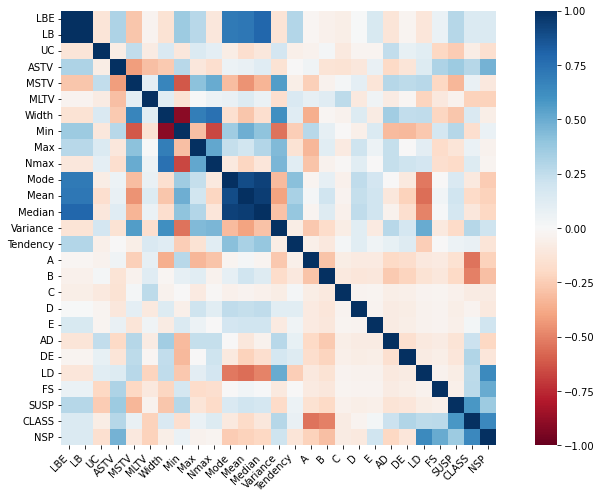

In [12]:
# Se imprime la matriz de correlación o mapa de calor
# para conocer el índice de correlación positivo o negativo de los atributos
# Se configura el atributo annot como False para una correcta visualización  
plt.figure(figsize=(14, 8))
corr = df_base.corr()
colores = sns.diverging_palette(20, 220, n=200)
ax = sns.heatmap(df_base.corr(), annot=False, cmap=plt.cm.RdBu, vmin=-1, vmax=1, center=0, square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

## Tratamiento de valores faltantes

En la etapa de tratamiento de valores faltantes se recomienda:

* Si hay muchos datos faltantes es recomendable borrar esas líneas.
* Si una variable tiene algunas filas con datos faltantes, puede optar por eliminarlas.
* Para las variables categóricas, puede agregar un estado adicional que describa el factor.
* Los datos faltantes, de las variables numéricas y categóricas se pueden completar con la media, la mediana o la moda de la variable.
* Para las variables categóricas, se puede optar por asignar categorías aleatoriamente, seleccionar las que existen en la variable e intentar encontrar que estén distribuidas uniformemente.
* A veces no hay valores faltantes o nulos, y hay valores cero que realmente reflejan datos faltantes.

In [13]:
# Se suman los ceros por columna
# Se realizó una verificación en donde se determina que los valores cero
# corresponden a una categoría de cada atributo
(df_base==0).sum(axis=0)

LBE            0
LB             0
UC           332
ASTV           0
MSTV           0
MLTV         137
Width          0
Min            0
Max            0
Nmax         107
Mode           0
Mean           0
Median         0
Variance     187
Tendency    1115
A           1742
B           1547
C           2073
D           2045
E           2054
AD          1794
DE          1874
LD          2019
FS          2057
SUSP        1929
CLASS          0
NSP            0
dtype: int64

In [14]:
# Se muestran los límites del dataset
df_base.shape

(2129, 27)

In [15]:
# Se muestra el número de resgistros con campos nulos
df_base.isnull().sum()

LBE         3
LB          3
UC          2
ASTV        2
MSTV        2
MLTV        2
Width       3
Min         3
Max         3
Nmax        3
Mode        3
Mean        3
Median      3
Variance    3
Tendency    3
A           3
B           3
C           3
D           3
E           3
AD          3
DE          3
LD          3
FS          3
SUSP        3
CLASS       3
NSP         3
dtype: int64

In [16]:
# Se eliminan instancias con campos nulos
df_base = df_base.dropna()

In [17]:
# Se muestra el número de resgistros con campos nulos
df_base.isnull().sum()

LBE         0
LB          0
UC          0
ASTV        0
MSTV        0
MLTV        0
Width       0
Min         0
Max         0
Nmax        0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
A           0
B           0
C           0
D           0
E           0
AD          0
DE          0
LD          0
FS          0
SUSP        0
CLASS       0
NSP         0
dtype: int64

In [18]:
# Se muestran los límites del dataset
df_base.shape

(2126, 27)

## Detección de anomalías

En la etapa de detección de anomalías se detectan los valores atípicos de las observaciones, debido a que son valores extraños, distintos o no encajan de manera adecuada en el conjunto de datos. También se le llama anomalías.

Existen dos tipos de outliers:
- Univariate: solo tenemos en cuenta una variable.
- Multivariate: tenemos en cuenta n-variables.

## Método intercuartil

En este método se utiliza el cálculo del rango intercuartil para detectar outliers.

Son outliers si están por debajo del (Q1 − 1.5xIQR) o por encima (Q3 + 1.5x IQR)

In [19]:
# Función para detectar outliers con el método intercuartil
def out_iqr(df, column):
    global lower, upper
    q25, q75 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
    # IQR
    iqr = q75 - q25
    # Límite de valores atípicos
    cut_off = iqr * 1.5
    # cálculo del valor superiror e inferior
    lower, upper = q25 - cut_off, q75 + cut_off
    print('IQR', iqr)
    print('El limite inferior es', lower)
    print('El limite superior es', upper)
    # cálculo del número de registros por debajo y encima del valor, límite inferior y superior respectivamente
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Número total de outliers detectados', df1.shape[0] + df2.shape[0])

In [20]:
# Función para eliminar outliers con el método intercuartil
def out_iqr2(df, column):
    global lower, upper
    q25, q75 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    df1 = df[df[column] < upper]    
    df2 = df1[df1[column] > lower]
    return df2

In [21]:
df_base2 = out_iqr2(df_base, "UC")
df_base2 = out_iqr2(df_base2, "MSTV")
df_base2 = out_iqr2(df_base2, "MLTV")
df_base2 = out_iqr2(df_base2, "Max")
df_base2 = out_iqr2(df_base2, "Nmax")
df_base2 = out_iqr2(df_base2, "Mode")
df_base2 = out_iqr2(df_base2, "Mean")
df_base2 = out_iqr2(df_base2, "Median")
df_base2 = out_iqr2(df_base2, "Variance")

In [22]:
# Se muestran los límites del dataset
df_base2.shape

(1597, 27)

## Método de la desviación estándar

Este método consiste en determinar cuánto se separan los outliers desde la media.

In [23]:
# Función para detectar outliers con el método de la desviación estándar
def out_std(df, column):
    global lower,upper
    # cálculo de la media y desviación estándar
    data_mean, data_std = df[column].mean(), df[column].std()
    # calculo del punto de corte
    cut_off = data_std * 3
    # Cálculo del punto por debajo y por encima del punto de corte
    lower, upper = data_mean - cut_off, data_mean + cut_off
    print('El límite inferior es', lower)
    print('El limite superior es', upper)
    # cálculo del número de registros por debajo y por encima.
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Número total de outliers', df1.shape[0] + df2.shape[0])

In [24]:
# Función para eliminar outliers con el método de la desviación estándar
def out_std2(df, column):
    global lower,upper
    data_mean, data_std = df[column].mean(), df[column].std()
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    df1 = df[df[column] < upper]
    df2 = df1[df1[column] > lower]
    return df2

In [25]:
out_std2 = out_iqr2(df_base2, "UC")
out_std2 = out_iqr2(df_base2, "MSTV")
out_std2 = out_iqr2(df_base2, "MLTV")
out_std2 = out_iqr2(df_base2, "Max")
out_std2 = out_iqr2(df_base2, "Nmax")
out_std2 = out_iqr2(df_base2, "Mode")
out_std2 = out_iqr2(df_base2, "Mean")
out_std2 = out_iqr2(df_base2, "Median")
out_std2 = out_iqr2(df_base2, "Variance")

In [26]:
# Se muestran los límites del dataset
df_base2.shape

(1597, 27)

## Comprobando el resultado en la eliminación de outliers

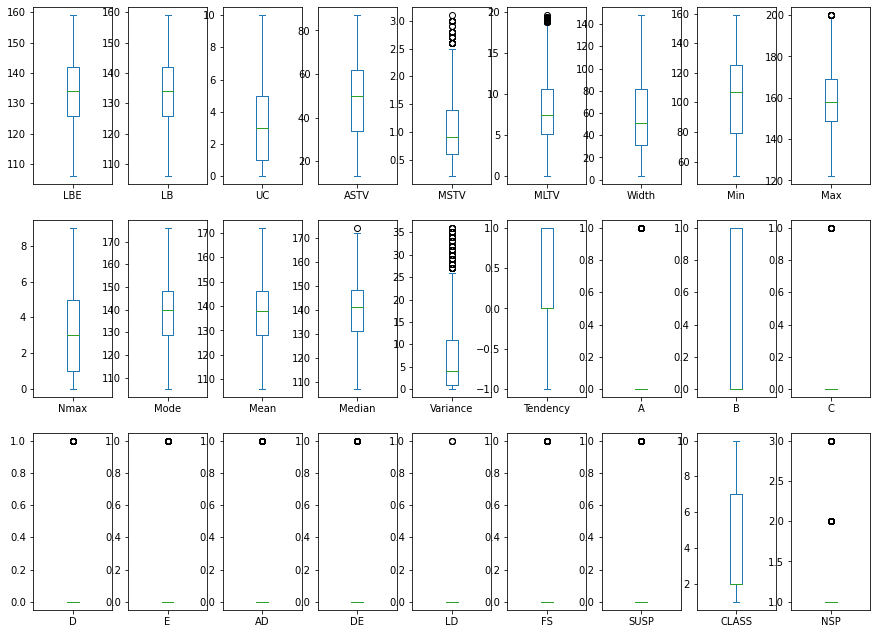

In [27]:
# Se imprimen diagramas de cajas y bigotes para conocer la distribución de los datos
# y los posibles datos atípicos en los atributos
df_base2.plot(kind='box', subplots=True, layout=(4,9),
             sharex=False, sharey=False, figsize=(15,15))
plt.show()

## Algoritmo K-Means

In [28]:
# Fuente: https://www.aprendemachinelearning.com/k-means-en-python-paso-a-paso/
# Se muestra la frecuencia absoluta de las categorías del atributo NSP 
print(df_base2.groupby('NSP').size())

NSP
1.0    1268
2.0     259
3.0      70
dtype: int64


In [29]:
# Concretamos la estructura de datos que utilizaremos para alimentar el algoritmo. 
# sólo cargamos las columnas op, ex y ag en nuestra variable X.
X = np.array(df_base2.drop(['NSP'], axis=1))
# Y = np.array(df_base2['NSP'])

In [30]:
# Se muestran los límites del dataset X
X.shape

(1597, 26)

## Obtención el valor de K

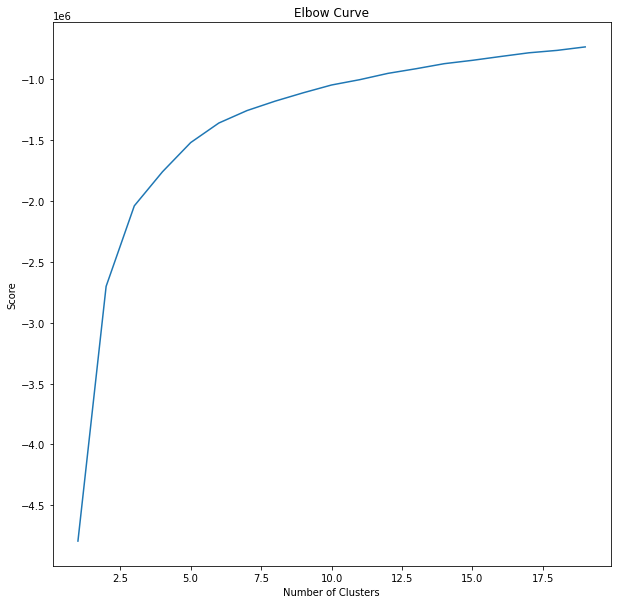

In [31]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.rcParams['figure.figsize'] = (10, 10)
plt.plot(Nc, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [32]:
# 3 es un buen valor
kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
# print(centroids)

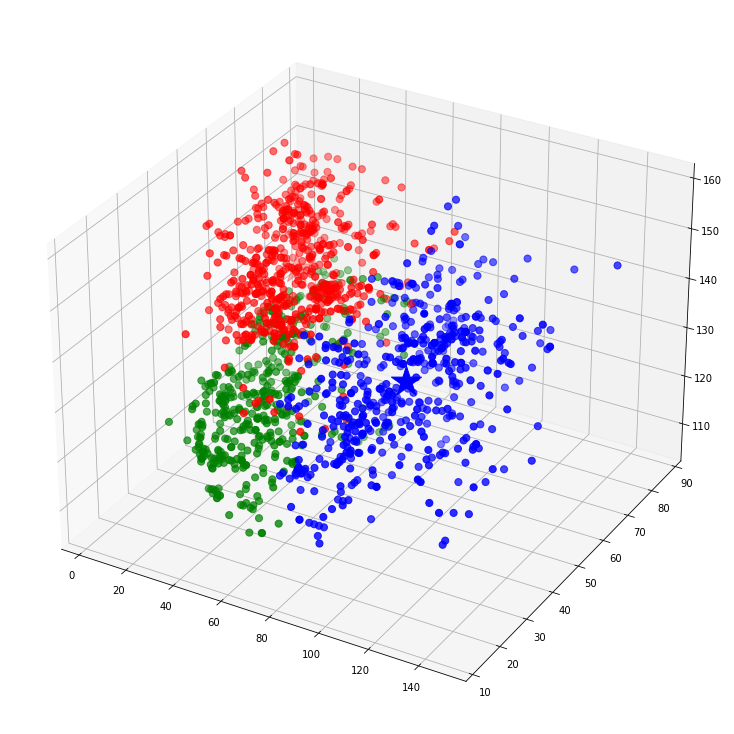

In [33]:
#Graficamos en 3D para ver si es coherente
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red', 'blue', 'green'] #'cyan', 'yellow'
asignar=[]
for row in labels:
    asignar.append(colores[row])
fig = plt.figure(figsize=(10, 10))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
ax.scatter(X[:, 6], X[:, 3], X[:, 0], c=asignar, s=50) # Datos
ax.scatter(C[:, 6], C[:, 3], C[:, 0], marker='*', c=colores, s=1000); # Centroides

## Dendrograma

In [34]:
def plot_dendrogram(model, **kwargs):
    # Creación de una matriz de vinculación, para graficar el dendograma
    # Creación de los conteos de las muestras por debajo de cada nodo
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Gráfico correspondiente al Dendograma
    dendrogram(linkage_matrix, **kwargs)

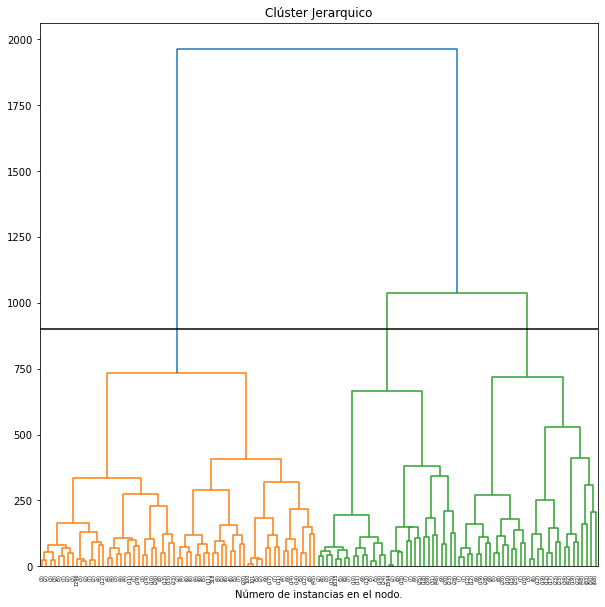

In [35]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X)
plt.title("Clúster Jerarquico")
plt.rcParams['figure.figsize'] = (10, 10)
# Gráfico de tres niveles del dendograma 
plot_dendrogram(model, truncate_mode="level", p=6)
plt.xlabel("Número de instancias en el nodo.")
# Corte del dendograma en el número max_d
plt.axhline(y=900, c='k')
plt.show()

## Conclusiones

Las técnicas aplicadas para la detección de anómalias y técnicas de agrupamiento pertenecen al aprendizaje no supervisado.
Las cuales sirven para poder: interpretar, agrupar, dividir y generar metricas de similitud para su representación.

Para lo cual hemos concluido lo siguiente:
- Se realizó una caracterización textual, visual y estadística del dataset de cardiotocología.
- Se imprimieron los histogramas de los atributos para conocer la distribución de los datos.
- Se imprimieron los diagramas de cajas y bigotes para conocer la distribución de los datos y conocer los datos posibles datos atípicos en los atributos.
- Se imprimió la matriz de correlación o mapa de calor para conocer el índice de correlación positivo o negativo de los atributos.
- Se aplicaron dos algoritmos de detección de anomalías u outliers, uno con el método del rango intercuartílico y otro con el método de la desviación estándar.
- Se aplicaron los algoritmos de agrupamiento k-medias y clustering jerárquico con la graficación del método del codo y el dendograma.

Se aprecia que el algoritmo de K-Means con K=3 ha agrupado los datos. Se concluye que no hay 3 clusters claramente diferenciados.